## Audio classification using CNNs

**Download the dataset from the below link**

[Data](https://drive.google.com/drive/folders/1YuzRUYVXOscxmsvQSffU8cBoBdDGnlrq?usp=sharing)

Audio classification can be performed by converting audio streams into spectrograms, which provide visual representations of spectrums of frequencies as they vary over time, and classifying the spectrograms using convolutional neural networks (CNNs). The spectrograms below were generated from WAV files with chainsaw sounds in the foreground and rainforest sounds in the background. Let's use Keras to build a CNN that can identify the tell-tale sounds of logging operations and distinguish them from ambient sounds such as wildlife and thunderstorms.

In [11]:
!pip uninstall gdown -y && pip install gdown
!gdown -V

Found existing installation: gdown 4.6.6
Uninstalling gdown-4.6.6:
  Successfully uninstalled gdown-4.6.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
gdown 4.7.1 at /usr/local/lib/python3.10/dist-packages


In [27]:
!gdown --folder https://drive.google.com/drive/folders/15XPnBtuauTqArNRV3IUiTfliBpJUWUIc -O /content/Sounds/test_data --remaining-ok
!gdown --folder https://drive.google.com/drive/folders/15Otqc5iKwAcKRKAdzM04wpXnxALpiEBs -O /content/Sounds/storm --remaining-ok
!gdown --folder https://drive.google.com/drive/folders/14Ue4J5SyXfgsZyliVEaEVhwKjHXnrFT9 -O /content/Sounds/engine --remaining-ok
!gdown --folder https://drive.google.com/drive/folders/14q4XtmQsdcrJ3t0mirSj0TyKr_4-XVaQ -O /content/Sounds/chainsaw --remaining-ok
!gdown --folder https://drive.google.com/drive/folders/1-1H3C4dEUAvuIt45aVEByliaHdgGnXw1 -O /content/Sounds/background --remaining-ok

Retrieving folder list
Processing file 16DKpk4inrSgKjLS9A2rafs8EsJ4G5eAv sample1.wav
Processing file 16CyADThUn_0aJDHj-86G0ZTAPrkDnWb9 sample2.wav
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=16DKpk4inrSgKjLS9A2rafs8EsJ4G5eAv
To: /content/Sounds/test_data/sample1.wav
100% 1.76M/1.76M [00:00<00:00, 50.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=16CyADThUn_0aJDHj-86G0ZTAPrkDnWb9
To: /content/Sounds/test_data/sample2.wav
100% 1.80M/1.80M [00:00<00:00, 33.1MB/s]
Download completed
Retrieving folder list
Processing file 16CO-q1aAxL7jO9K9zOzFWSxZNYfZsz_O storm_00.wav
Processing file 169N2EX6M69V8uyvkc_xn_VdTdAiZBHD5 storm_01.wav
Processing file 168EA48JE0__9_BUbS1EdZbmy8pY5nOrS storm_02.wav
Processing file 161H68Zd7tF7N8Fmr00WgIc-J-cIQvaWX storm_03.wav
Processing file 160Z0vu0ST8vdSq-gZe2U1Xz-JuELIc8P storm_04.wav
Processing file 15ugCb4UqnquFDAewsr987qRTqNZ03sf7 storm_0

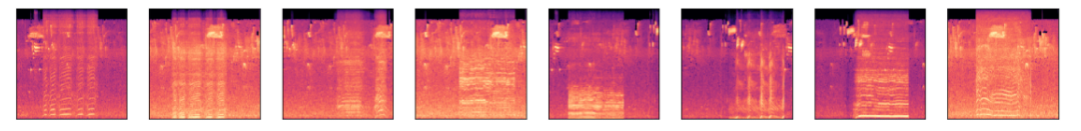

## Generate Spectrogram



The "Sounds" directory contains subdirectories named "background," "chainsaw," "engine," and "storm." Each subdirectory contains 100 WAV files. The WAV files in the "background" directory contain rainforest background noises only, while the files in the other subdirectories include the sounds of chainsaws, engines, and thunderstorms overlaid on the background noises. These WAV files were generated by using a soundscape-synthesis package named Scaper to combine sounds in the public UrbanSound8K dataset with rainforest sounds obtained from YouTube.

The first step is to load the WAV files, use a Python package named Librosa to generate spectrogram images from them, load the spectrograms into memory, and prepare them for use in training a CNN. To aid in this process, we'll define a pair of helper functions for creating spectrograms from WAV files and converting all the WAV files in a specified directory into spectrograms.

In [28]:
## Just Run the below code-block

import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def spectrogram_creation(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

def save_spectograms(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        spectrogram_creation(input_file, output_file)

In [29]:
## in this cell call the above functions for creating spectrograms for every class of waves.

save_spectograms('Sounds/background', 'Spectrograms/background')
save_spectograms('Sounds/chainsaw', 'Spectrograms/chainsaw')
save_spectograms('Sounds/engine', 'Spectrograms/engine')
save_spectograms('Sounds/storm', 'Spectrograms/storm')

Define two new helper functions for loading and displaying spectrograms and declare two Python lists — one to store spectrogram images, and another to store class labels.

In [38]:
from tensorflow.keras.preprocessing import image

def loading_spectrograms(path, label):
    '''
    This function is used for loading images from their root path provided.
    During this process, resize images to 224*224 by setting the target size in loading function.
    Then convert them to tensor and finally append them to a corresponding list.
    Hint:
      https://docs.w3cub.com/tensorflow~python/tf/keras/preprocessing/image/load_img
      https://docs.w3cub.com/tensorflow~2.3/keras/preprocessing/image/img_to_array
    Arguments:
      path: path to the .png files of the label class
      label: a specific class of sounds
    return:
      images: png files converted to the tensor
      labels: label of the class corresponding to the images
    '''

    ##############################################
    ############# YOUR CODES GO HERE #############
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels
    ##############################################

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = [] # list of training images for CNN
y = [] # list of corresponding labels to the images

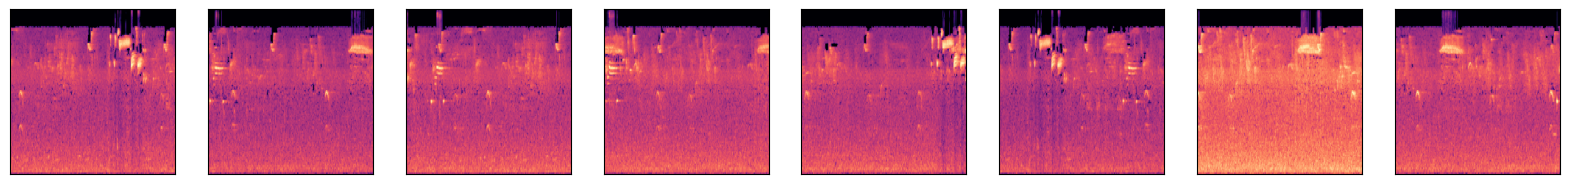

In [39]:
## load each directory's images and label:
'''
suggested classes for each directory:
background -> 0
chainsaw -> 1
engine -> 2
storm -> 3
'''
## after loading the images, concat them to the x and y lists respectively
## show some of them

images, labels = loading_spectrograms('Spectrograms/background', 0)
show_images(images)

x += images
y += labels


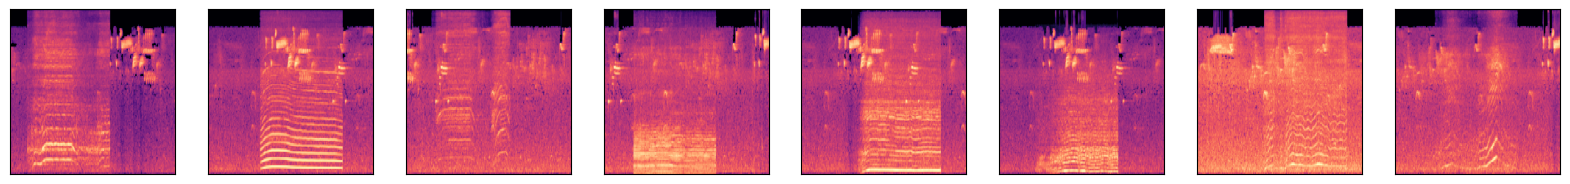

In [40]:
images, labels = loading_spectrograms('Spectrograms/chainsaw', 1)
show_images(images)

x += images
y += labels

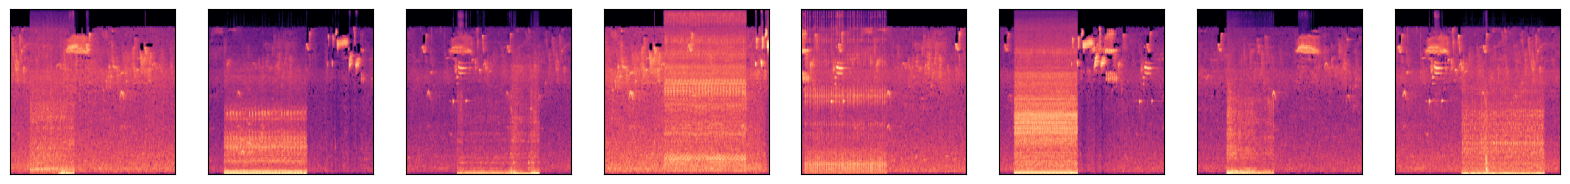

In [41]:
images, labels = loading_spectrograms('Spectrograms/engine', 2)
show_images(images)

x += images
y += labels


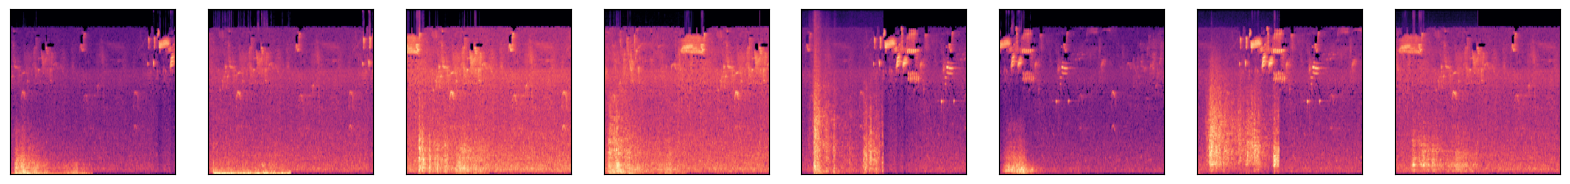

In [42]:
images, labels = loading_spectrograms('Spectrograms/storm', 3)
show_images(images)

x += images
y += labels

Split the images and labels into two datasets — one for training, and one for testing. Then divide the pixel values by 255 and one-hot-encode the labels using Keras's [to_categorical](https://keras.io/api/utils/python_utils/#to_categorical-function) function.

In [43]:
## because your data is in list, convert them to np.array

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Build and train a CNN

State-of-the-art image classification typically isn't done with traditional neural networks. Rather, it is performed with convolutional neural networks that use [convolution layers](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/) to extract features from images and [pooling layers](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/) to downsize images so features can be detected at various resolutions. The next task is to build a CNN containing a series of convolution and pooling layers for feature extraction, a pair of fully connected layers for classification, and a softmax layer that outputs probabilities for each class, and to train it with spectrogram images and labels. Start by defining the CNN.

Build below network

Model: "sequential"

Layer (type)                 Output Shape              #Param
-----------------------------------------------------------------
conv2d (Conv2D)              (None, 222, 222, 32)      896
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     36992
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       147584
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 128)       0
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0
_________________________________________________________________
dense (Dense)                (None, 1024)              18875392
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4100

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
'''
Hint:
  https://keras.io/api/models/sequential/
  https://keras.io/api/layers/convolution_layers/convolution2d/
  https://keras.io/api/layers/pooling_layers/max_pooling2d/
  https://keras.io/api/layers/reshaping_layers/flatten/
  https://keras.io/api/layers/core_layers/dense/

finally compile the model with Adam optimizer and CE loss function
please consider to define the input_shape for first Conv layer which has a same rule as Input layer
'''


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

Train the CNN and save the history object returned by fit in a local variable.

In [45]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
14/14 [==============================] - 39s 3s/step - loss: 1.5863 - accuracy: 0.3143 - val_loss: 1.2832 - val_accuracy: 0.4167
Epoch 2/10
14/14 [==============================] - 31s 2s/step - loss: 0.9380 - accuracy: 0.5714 - val_loss: 1.2201 - val_accuracy: 0.6667
Epoch 3/10
14/14 [==============================] - 31s 2s/step - loss: 0.8936 - accuracy: 0.6857 - val_loss: 0.9269 - val_accuracy: 0.5500
Epoch 4/10
14/14 [==============================] - 35s 3s/step - loss: 0.6252 - accuracy: 0.7571 - val_loss: 0.7755 - val_accuracy: 0.7167
Epoch 5/10
14/14 [==============================] - 31s 2s/step - loss: 0.5967 - accuracy: 0.7071 - val_loss: 0.5214 - val_accuracy: 0.7167
Epoch 6/10
14/14 [==============================] - 32s 2s/step - loss: 0.4121 - accuracy: 0.8214 - val_loss: 0.3783 - val_accuracy: 0.8167
Epoch 7/10
14/14 [==============================] - 30s 2s/step - loss: 0.2838 - accuracy: 0.8429 - val_loss: 0.3750 - val_accuracy: 0.8167
Epoch 8/10
14/14 [==

Plot the training and validation accuracy.

[]

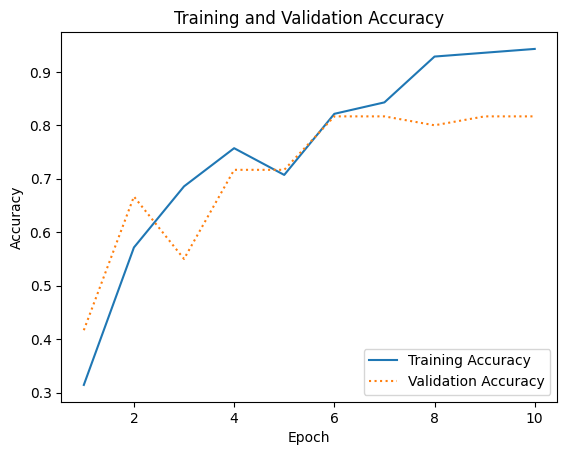

In [46]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Run the test images through the network and use a confusion matrix to assess the results.

2/2 [==============================] - 5s 2s/step


Text(109.44999999999997, 0.5, 'Actual label')

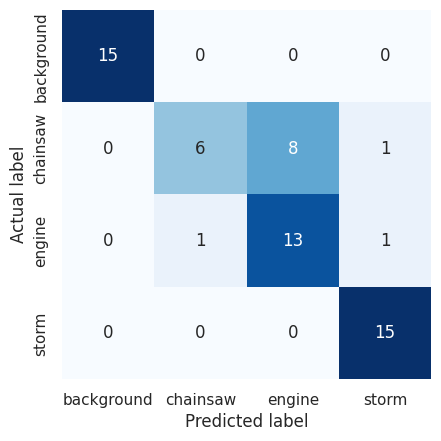

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(x_test_norm)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))

class_labels = ['background', 'chainsaw', 'engine', 'storm']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')